In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
data=pd.read_csv("/kaggle/input/water-potability/water_potability.csv")

In [ ]:
DATA UNDERSTANDING

In [5]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
data.shape

(3276, 10)

In [8]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [12]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
DATA CLEANING

In [52]:
data['ph'] = data['ph'].fillna(data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].median())

In [53]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [31]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [25]:
print('Covariance:')
display(data.cov(numeric_only=True))

Covariance:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,2.160771,3.665148,-1.055433e+03,-0.074026,0.765186,2.042492,0.194811,0.069405,-0.041551,-0.002357
Hardness,3.665148,1081.078715,-1.352149e+04,-1.564367,-110.239624,-63.552473,0.392670,-6.579802,-0.370747,-0.221943
Solids,-1055.432944,-13521.486526,7.688783e+07,-973.746052,-47487.109765,9802.117116,297.108377,-1227.205758,133.751106,144.345121
Chloramines,-0.074026,-1.564367,-9.737461e+02,2.506158,1.361250,-2.621264,-0.066268,0.415084,0.002920,0.018365
Sulfate,0.765186,-110.239624,-4.748711e+04,1.361250,1306.288414,-41.069488,3.217409,-14.593967,-0.276139,-0.363559
Conductivity,2.042492,-63.552473,9.802117e+03,-2.621264,-41.069488,6532.529330,5.605967,1.599718,0.365712,-0.320499
Organic_carbon,0.194811,0.392670,2.971084e+02,-0.066268,3.217409,5.605967,10.943936,-0.676942,-0.070499,-0.048419
Trihalomethanes,0.069405,-6.579802,-1.227206e+03,0.415084,-14.593967,1.599718,-0.676942,248.689155,-0.264610,0.053547
Turbidity,-0.041551,-0.370747,1.337511e+02,0.002920,-0.276139,0.365712,-0.070499,-0.264610,0.608997,0.000602
Potability,-0.002357,-0.221943,1.443451e+02,0.018365,-0.363559,-0.320499,-0.048419,0.053547,0.000602,0.237997


In [ ]:
DATA VISUALIZATION

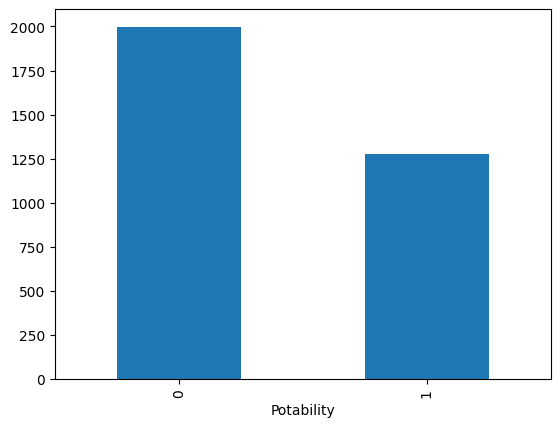

In [34]:
data['Potability'].value_counts().plot(kind='bar')
plt.show()


<Axes: >

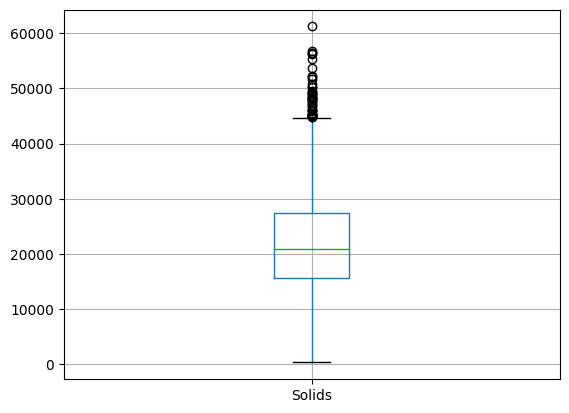

In [35]:
data.boxplot(column=['Solids'])

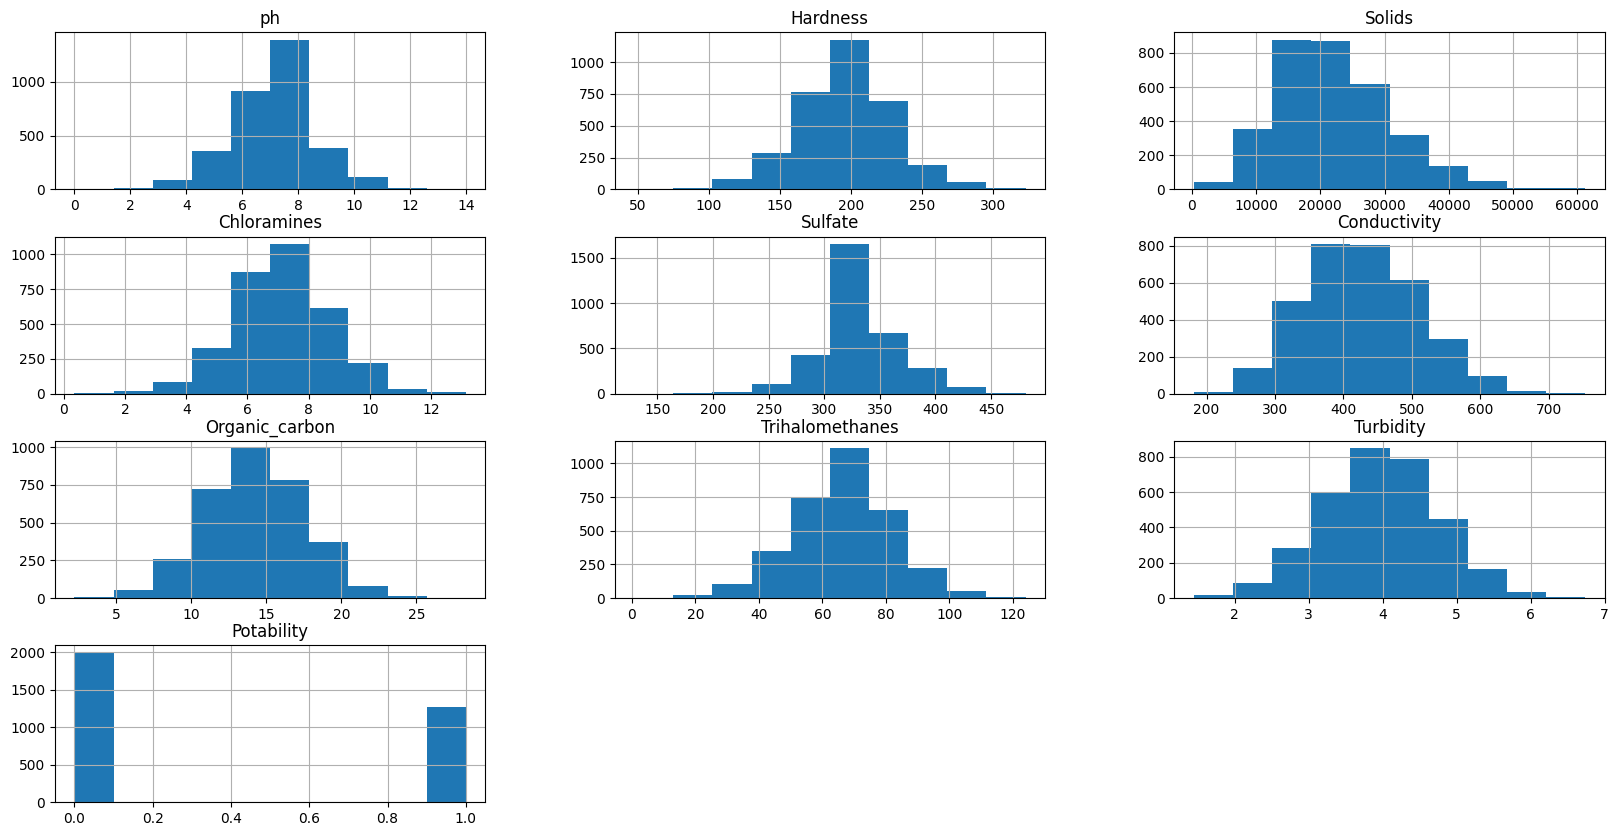

In [37]:
plt.rcParams['figure.figsize'] = [20,10]
data.hist()
plt.show()

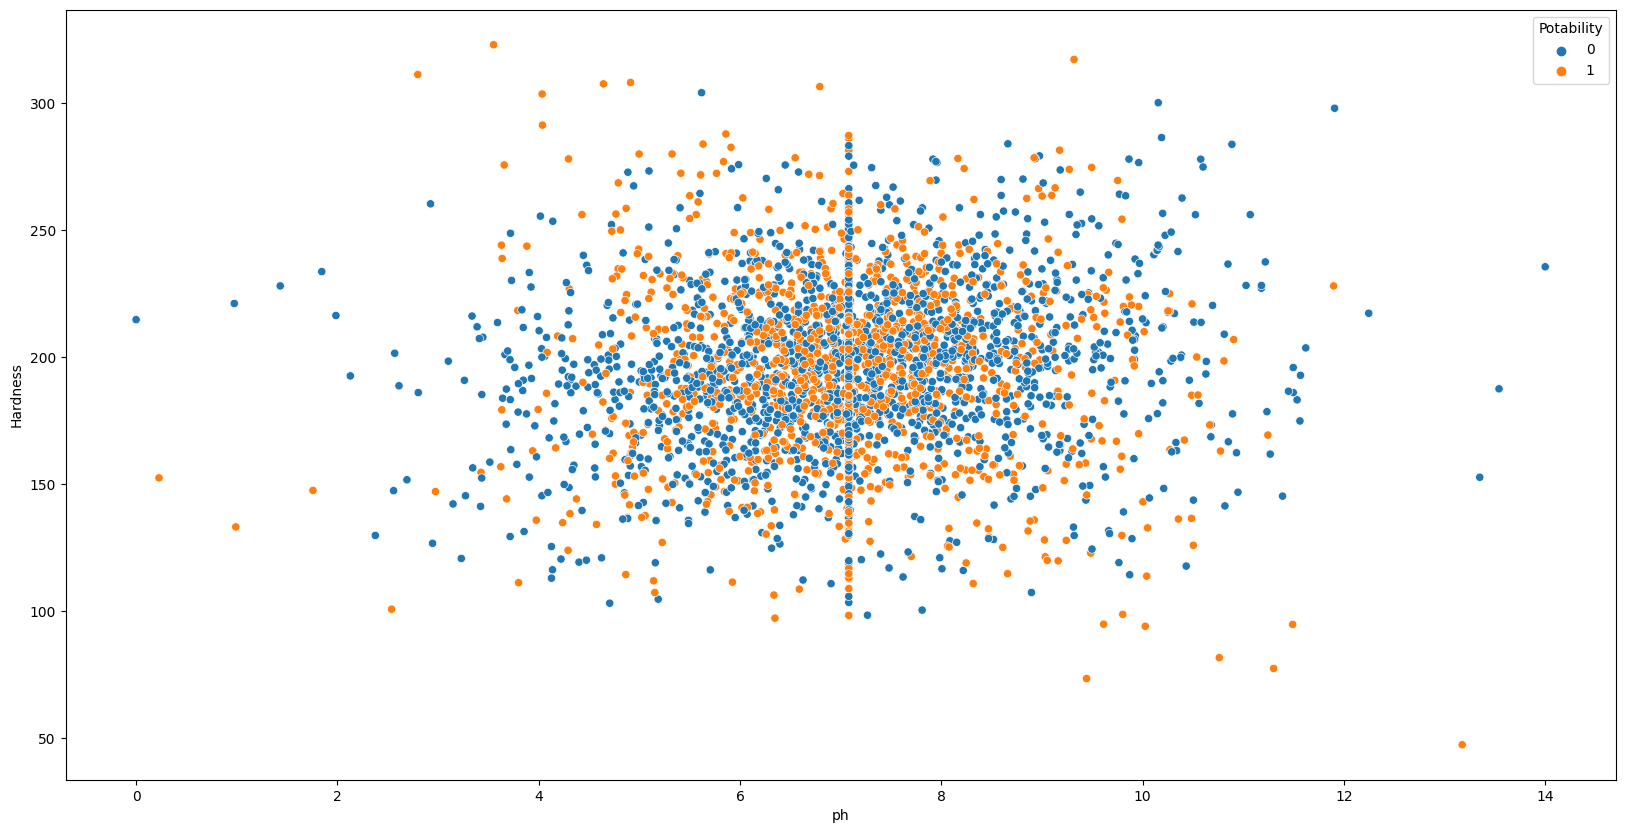

In [46]:
sns.scatterplot(data,x="ph",y="Hardness",hue="Potability")
plt.show()

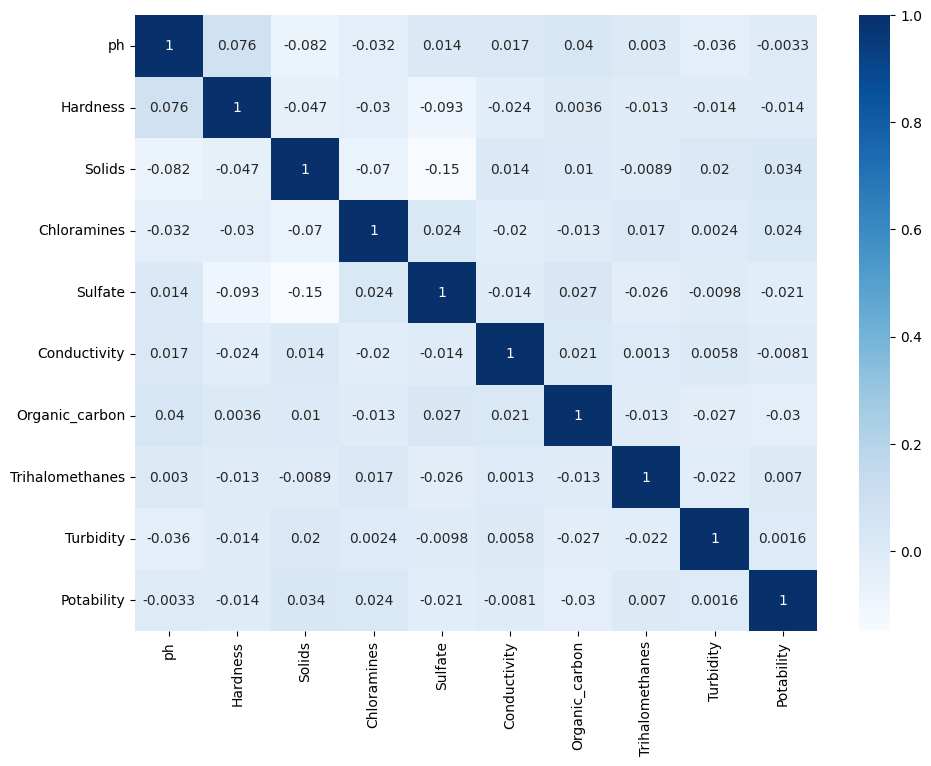

In [48]:
plt.figure(figsize=(11,8))
sns.heatmap(data.corr(), annot=True,cmap='Blues')
plt.show()

In [57]:
x=data.drop('Potability',axis=1)
y=data["Potability"]

In [59]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [61]:
x = scaler.fit_transform(x)
x

array([[-1.35823629e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [ ]:
FEATURE SCALING

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
MODEL TRAINING

In [ ]:
LOGISTIC REGRESSION

In [65]:
from sklearn.linear_model import LogisticRegression

logregress = LogisticRegression()

logregress.fit(X_train,y_train)

LogisticRegression()

In [117]:
pred_lg=logregress.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score
a=accuracy_score(y_test,pred_lg)*100
a

62.80487804878049

In [119]:
confusion_matrix=confusion_matrix(y_test,pred_lg)
confusion_matrix

array([[412,   0],
       [244,   0]])

In [135]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
DECISION TREE

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [102]:
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [103]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [126]:
pred_dt= model_dt.predict(X_test)

In [144]:
dt = accuracy_score(y_test,pred_dt)
print(dt*100)

63.262195121951216


In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74       412
           1       0.51      0.31      0.38       244

    accuracy                           0.63       656
   macro avg       0.59      0.57      0.56       656
weighted avg       0.61      0.63      0.61       656

